## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- How to Load RealTime Datasets 
- 19AI413-Deep Learning and Its Applications
- Unit - 2 
- 04/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

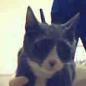

In [3]:
# check the full file path 
with Image.open('../Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [4]:
# create list of image files 

path = "../Data/CATS_DOGS"
img_names = []

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/' +img)

In [5]:
len(img_names)

24997

In [6]:
# creat a data frame
img_sizes = []
rejected = []

for item in img_names:
    try:
        with Image.open(item) as img:
            img_sizes.append(img.size)


    except:
        rejected.append(item)

        

In [7]:
print(len(img_sizes))

24994


In [8]:
print(len(rejected))

3


In [9]:
df = pd.DataFrame(img_sizes)

In [10]:
df.head()  # 0 ----> width , 1 ---> height

,0,1
0,365,500
1,484,500
2,448,500
3,500,483
4,500,375


In [11]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [12]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [13]:
dog = Image.open('../Data/CATS_DOGS/train/DOG/14.jpg')

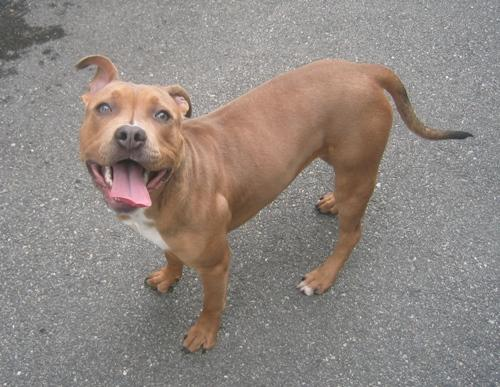

In [14]:
display(dog)

In [15]:
dog.size

(500, 387)

In [16]:
dog.getpixel((0,0))

(90, 95, 98)

In [17]:
# usually pixes varies from 0 to 255
#let v check 



In [18]:
dog.getpixel((0,0))

(90, 95, 98)

In [19]:
# now tranform this images to tensor 
transform = transforms.Compose([
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)
# to perform variety of transformations hence using compose ( previously ve used ToTensor)



<class 'torch.Tensor'>
torch.Size([3, 387, 500])


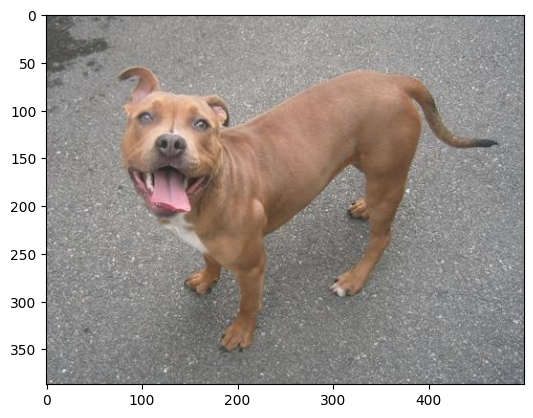

In [20]:
# 387,500,3
#(1,2,0)

plt.imshow(im.permute(1, 2, 0))
plt.show()

In [21]:
im

tensor([[[0.3529, 0.3451, 0.3373,  ..., 0.5686, 0.5333, 0.5216],
         [0.3255, 0.3412, 0.3333,  ..., 0.5765, 0.5451, 0.5294],
         [0.2863, 0.3216, 0.3373,  ..., 0.5529, 0.5255, 0.4980],
         ...,
         [0.5686, 0.5373, 0.4824,  ..., 0.5686, 0.5059, 0.5216],
         [0.6157, 0.5922, 0.4941,  ..., 0.5294, 0.5176, 0.5176],
         [0.5922, 0.5843, 0.5020,  ..., 0.5882, 0.6314, 0.6039]],

        [[0.3725, 0.3647, 0.3569,  ..., 0.5725, 0.5373, 0.5255],
         [0.3451, 0.3608, 0.3529,  ..., 0.5804, 0.5490, 0.5333],
         [0.3059, 0.3412, 0.3569,  ..., 0.5569, 0.5294, 0.5020],
         ...,
         [0.5608, 0.5294, 0.4745,  ..., 0.5765, 0.5137, 0.5294],
         [0.6000, 0.5765, 0.4863,  ..., 0.5373, 0.5255, 0.5255],
         [0.5765, 0.5686, 0.4941,  ..., 0.5961, 0.6392, 0.6118]],

        [[0.3843, 0.3765, 0.3686,  ..., 0.5882, 0.5529, 0.5412],
         [0.3569, 0.3725, 0.3647,  ..., 0.5961, 0.5647, 0.5490],
         [0.3176, 0.3529, 0.3686,  ..., 0.5725, 0.5451, 0.

In [22]:
im[:,0,0]

tensor([0.3529, 0.3725, 0.3843])

In [23]:
np.array((90,95,98))/255  # pytorch atomically do normaization

array([0.35294118, 0.37254902, 0.38431373])

<class 'torch.Tensor'>
torch.Size([3, 224, 289])


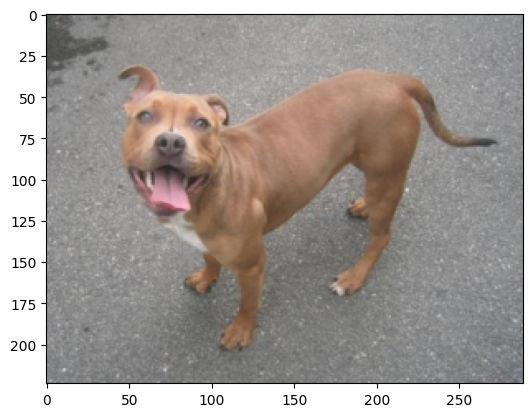

In [24]:
# how to resize the image 

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show()

<class 'torch.Tensor'>
torch.Size([3, 224, 224])


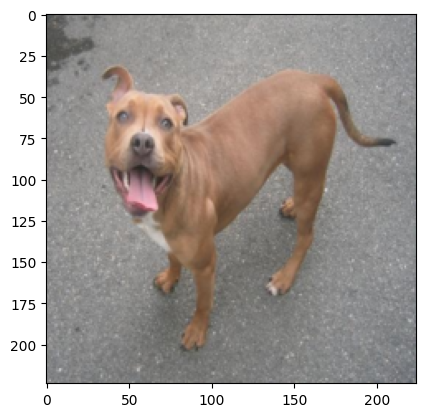

In [25]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show()

<class 'torch.Tensor'>
torch.Size([3, 250, 250])


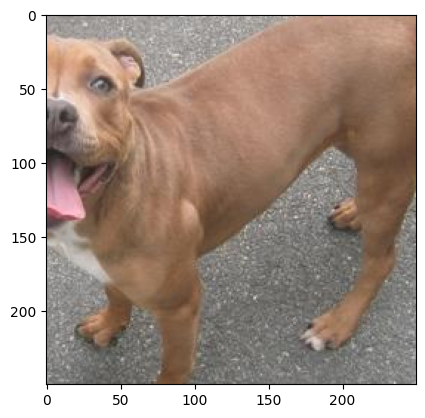

In [26]:
# how to do center Crop ( if the image more or less center we can do to get everything to the same size )
transform = transforms.Compose([
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show()

<class 'torch.Tensor'>
torch.Size([3, 250, 250])


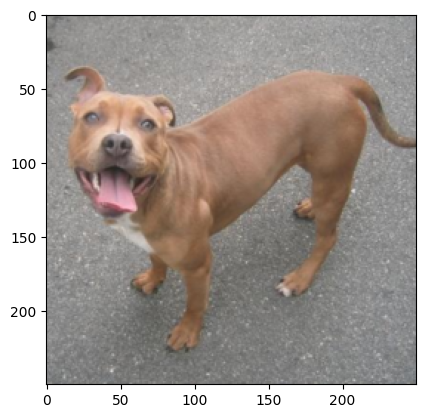

In [28]:
# before doing center crop, need to resize then its good
transform = transforms.Compose([
    transforms.Resize(250),
    transforms.CenterCrop(250),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show() 

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


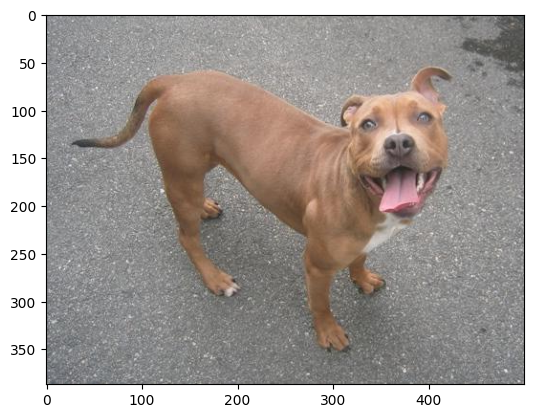

In [29]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show() 

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


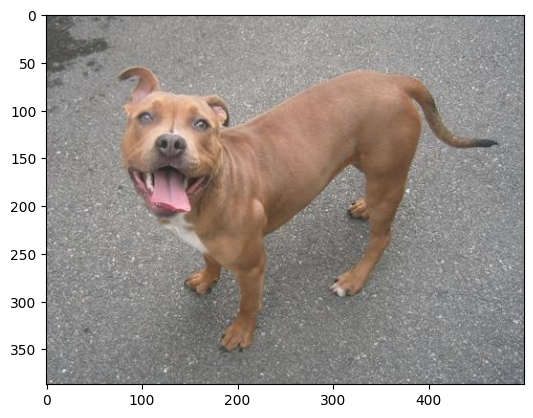

In [30]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show() 

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


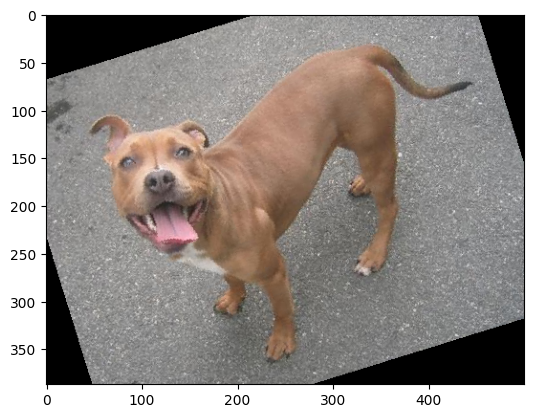

In [31]:
transform = transforms.Compose([
    transforms.RandomRotation(30),
    transforms.ToTensor()
])
im = transform(dog)
print(type(im))
print(im.shape)

plt.imshow(im.permute(1, 2, 0))
plt.show()  # somewhere between + and - degree

In [32]:
# in gnereal in stnd network like alex etc the normalization is between  0.5 to -0.5 but here it is between 0 to 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.5805322..2.5528543].


torch.Size([3, 387, 500])


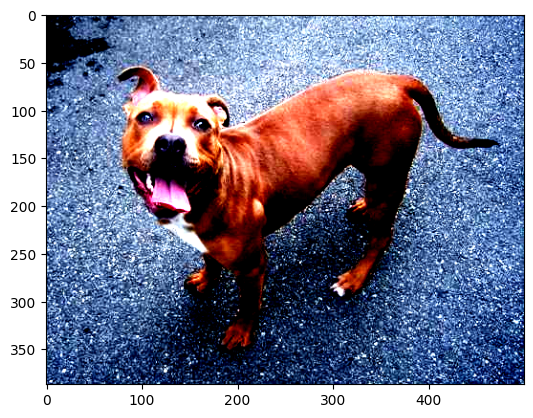

In [34]:
# how to do specific normalization 
# lot of model use this std mean and std
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])
im = transform(dog)
print(im.shape)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));
plt.show()

In [35]:
im

tensor([[[-0.5767, -0.6109, -0.6452,  ...,  0.3652,  0.2111,  0.1597],
         [-0.6965, -0.6281, -0.6623,  ...,  0.3994,  0.2624,  0.1939],
         [-0.8678, -0.7137, -0.6452,  ...,  0.2967,  0.1768,  0.0569],
         ...,
         [ 0.3652,  0.2282, -0.0116,  ...,  0.3652,  0.0912,  0.1597],
         [ 0.5707,  0.4679,  0.0398,  ...,  0.1939,  0.1426,  0.1426],
         [ 0.4679,  0.4337,  0.0741,  ...,  0.4508,  0.6392,  0.5193]],

        [[-0.3725, -0.4076, -0.4426,  ...,  0.5203,  0.3627,  0.3102],
         [-0.4951, -0.4251, -0.4601,  ...,  0.5553,  0.4153,  0.3452],
         [-0.6702, -0.5126, -0.4426,  ...,  0.4503,  0.3277,  0.2052],
         ...,
         [ 0.4678,  0.3277,  0.0826,  ...,  0.5378,  0.2577,  0.3277],
         [ 0.6429,  0.5378,  0.1352,  ...,  0.3627,  0.3102,  0.3102],
         [ 0.5378,  0.5028,  0.1702,  ...,  0.6254,  0.8179,  0.6954]],

        [[-0.0964, -0.1312, -0.1661,  ...,  0.8099,  0.6531,  0.6008],
         [-0.2184, -0.1487, -0.1835,  ...,  0

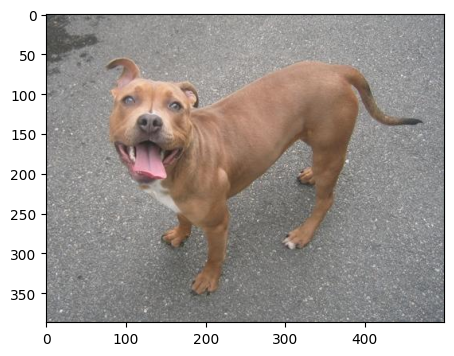

In [36]:
# inverse normalization 
# mean/ std 

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));
plt.show()

## Dr. Michael Mahesh K Saveetha Engineering College
- michaelmaheshk@gmail.com 
- How to Load RealTime Datasets 
- 19AI413-Deep Learning and Its Applications
- Unit - 2 
- 04/05
- EVEN SEM ( Slot: 4Z4-1 & 4U2-1)